In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [21]:
dataset = 'ft'

In [22]:
if dataset == 'gc':
    protected_attributes = ['age', 'sex', 'marital_status', 'own_telephone', 'employment'] # gc
    budget = 100
    root_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/multicolab_b{budget}'
elif dataset == 'ft':
    protected_attributes = ["SEX", "MAR", "AGEP", "NATIVITY", "MIG"] # ft
    budget = 500
    root_dir = f'/home/dhasade/audits/ml-audits/results/folktables/multicolab_b{budget}_new'
elif dataset == 'pp':
    protected_attributes = ["Female", "African_American", "Age_Below_TwentyFive", "Misdemeanor", "Number_of_Priors"] # pp
    budget = 250
    root_dir = f'/home/dhasade/audits/ml-audits/results/propublica/multicolab_b{budget}'

n = len(protected_attributes)

In [23]:
def get_dp_errors(root_dir, sample):
    strategy = 'aposteriori'
    agentwise_dps = [[] for _ in range(n)]
    for base_agent in range(n):
        attr = protected_attributes[base_agent]

        all_files = os.listdir(root_dir)

        base_agent_files = [f for f in all_files if attr in f]

        for k in range(2, n+1):

            files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f and sample in f]
            print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

            ds_k = []
            for f in files_k:
                df = pd.read_csv(os.path.join(root_dir, f))
                dp = df[df['attribute'] == attr]['dp_error'].mean()
                # print(dp)
                ds_k.append(dp)
            
            agentwise_dps[base_agent].append(np.mean(ds_k))
    aposteriori_dps = agentwise_dps

    strategy = 'apriori'
    agentwise_dps = [[] for _ in range(n)]
    for base_agent in range(n):
        attr = protected_attributes[base_agent]

        all_files = os.listdir(root_dir)

        base_agent_files = [f for f in all_files if attr in f]

        for k in range(2, n+1):

            files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f and sample in f]
            print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

            ds_k = []
            for f in files_k:
                df = pd.read_csv(os.path.join(root_dir, f))
                dp = df[df['attribute'] == attr]['dp_error'].mean()
                # print(dp)
                ds_k.append(dp)
            
            agentwise_dps[base_agent].append(np.mean(ds_k))
    apriori_dps = agentwise_dps

    strategy = 'none'
    all_files = os.listdir(root_dir)
    none_files = [f for f in all_files if 'none' in f and sample in f]
    assert len(none_files) == 1
    none_file = none_files[0]

    none_dps = []
    for attr in protected_attributes:
        df = pd.read_csv(os.path.join(root_dir, none_file))
        dp = df[df['attribute'] == attr]['dp_error'].mean()
        none_dps.append(dp)

    for i in range(n):
        apriori_dps[i] = [none_dps[i]] + apriori_dps[i]
        aposteriori_dps[i] = [none_dps[i]] + aposteriori_dps[i]

    uniform_cum_apriori_dps = np.array(apriori_dps).sum(axis=0)
    uniform_cum_aposteriori_dps = np.array(aposteriori_dps).sum(axis=0)
    uniform_cum_none_dps = np.array(none_dps).sum(axis=0).repeat(n)

    return uniform_cum_apriori_dps, uniform_cum_aposteriori_dps, uniform_cum_none_dps

In [24]:
def get_dp_errors_with_std(root_dir, sample):
    strategy = 'aposteriori'
    agentwise_dps = [[] for _ in range(n)]
    agentwise_dps_std = [[] for _ in range(n)]
    
    for base_agent in range(n):
        attr = protected_attributes[base_agent]

        all_files = os.listdir(root_dir)

        base_agent_files = [f for f in all_files if attr in f]

        for k in range(2, n+1):

            files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f and sample in f]
            print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

            ds_k = []; ds_k_std = []
            for f in files_k:
                df = pd.read_csv(os.path.join(root_dir, f))
                dp = df[df['attribute'] == attr]['dp_error'].mean()
                dp_std = df[df['attribute'] == attr]['dp_error'].std()
                # print(dp)
                ds_k.append(dp)
                ds_k_std.append(dp_std)
            
            agentwise_dps[base_agent].append(np.mean(ds_k))
            agentwise_dps_std[base_agent].append(np.mean(ds_k_std))

    aposteriori_dps = agentwise_dps
    aposteriori_dps_std = agentwise_dps_std

    strategy = 'apriori'
    agentwise_dps = [[] for _ in range(n)]
    agentwise_dps_std = [[] for _ in range(n)]
    for base_agent in range(n):
        attr = protected_attributes[base_agent]

        all_files = os.listdir(root_dir)

        base_agent_files = [f for f in all_files if attr in f]

        for k in range(2, n+1):

            files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f and sample in f]
            print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

            ds_k = []
            for f in files_k:
                df = pd.read_csv(os.path.join(root_dir, f))
                dp = df[df['attribute'] == attr]['dp_error'].mean()
                dp_std = df[df['attribute'] == attr]['dp_error'].std()
                # print(dp)
                ds_k.append(dp)
            
            agentwise_dps[base_agent].append(np.mean(ds_k))
            agentwise_dps_std[base_agent].append(np.mean(ds_k_std))

    apriori_dps = agentwise_dps
    apriori_dps_std = agentwise_dps_std

    strategy = 'none'
    all_files = os.listdir(root_dir)
    none_files = [f for f in all_files if 'none' in f and sample in f]
    assert len(none_files) == 1
    none_file = none_files[0]

    none_dps = []
    none_dps_std = []
    for attr in protected_attributes:
        df = pd.read_csv(os.path.join(root_dir, none_file))
        dp = df[df['attribute'] == attr]['dp_error'].mean()
        dp_std = df[df['attribute'] == attr]['dp_error'].std()
        none_dps.append(dp)
        none_dps_std.append(dp_std)

    for i in range(n):
        apriori_dps[i] = [none_dps[i]] + apriori_dps[i]
        aposteriori_dps[i] = [none_dps[i]] + aposteriori_dps[i]

        apriori_dps_std[i] = [none_dps_std[i]] + apriori_dps_std[i]
        aposteriori_dps_std[i] = [none_dps_std[i]] + aposteriori_dps_std[i]

    uniform_cum_apriori_dps = np.array(apriori_dps).sum(axis=0)
    uniform_cum_aposteriori_dps = np.array(aposteriori_dps).sum(axis=0)
    uniform_cum_none_dps = np.array(none_dps).sum(axis=0).repeat(n)

    uniform_cum_apriori_dps_std = np.array(apriori_dps_std).sum(axis=0)
    uniform_cum_aposteriori_dps_std = np.array(aposteriori_dps_std).sum(axis=0)
    uniform_cum_none_dps_std = np.array(none_dps_std).sum(axis=0).repeat(n)

    return uniform_cum_apriori_dps, uniform_cum_aposteriori_dps, uniform_cum_none_dps, uniform_cum_apriori_dps_std, uniform_cum_aposteriori_dps_std, uniform_cum_none_dps_std

In [25]:
sample = 'uniform'
uniform_cum_apriori_dps, uniform_cum_aposteriori_dps, uniform_cum_none_dps = get_dp_errors(root_dir, sample)

Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files: 4 for k=2 and attr=MAR
Number of files: 6 for k=3 and attr=MAR
Number of files: 4 for k=4 and attr=MAR
Number of files: 1 for k=5 and attr=MAR
Number of files: 4 for k=2 and attr=AGEP
Number of files: 6 for k=3 and attr=AGEP
Number of files: 4 for k=4 and attr=AGEP
Number of files: 1 for k=5 and attr=AGEP
Number of files: 4 for k=2 and attr=NATIVITY
Number of files: 6 for k=3 and attr=NATIVITY
Number of files: 4 for k=4 and attr=NATIVITY
Number of files: 1 for k=5 and attr=NATIVITY
Number of files: 4 for k=2 and attr=MIG
Number of files: 6 for k=3 and attr=MIG
Number of files: 4 for k=4 and attr=MIG
Number of files: 1 for k=5 and attr=MIG
Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files:

In [26]:
sample = 'stratified'
stratified_cum_apriori_dps, stratified_cum_aposteriori_dps, stratified_cum_none_dps = get_dp_errors(root_dir, sample)

Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files: 4 for k=2 and attr=MAR
Number of files: 6 for k=3 and attr=MAR
Number of files: 4 for k=4 and attr=MAR
Number of files: 1 for k=5 and attr=MAR
Number of files: 4 for k=2 and attr=AGEP
Number of files: 6 for k=3 and attr=AGEP
Number of files: 4 for k=4 and attr=AGEP
Number of files: 1 for k=5 and attr=AGEP
Number of files: 4 for k=2 and attr=NATIVITY
Number of files: 6 for k=3 and attr=NATIVITY
Number of files: 4 for k=4 and attr=NATIVITY
Number of files: 1 for k=5 and attr=NATIVITY
Number of files: 4 for k=2 and attr=MIG
Number of files: 6 for k=3 and attr=MIG
Number of files: 4 for k=4 and attr=MIG
Number of files: 1 for k=5 and attr=MIG
Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files:

In [27]:
sample = 'neyman'
neyman_cum_apriori_dps, neyman_cum_aposteriori_dps, neyman_cum_none_dps = get_dp_errors(root_dir, sample)

Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files: 4 for k=2 and attr=MAR
Number of files: 6 for k=3 and attr=MAR
Number of files: 4 for k=4 and attr=MAR
Number of files: 1 for k=5 and attr=MAR
Number of files: 4 for k=2 and attr=AGEP
Number of files: 6 for k=3 and attr=AGEP
Number of files: 4 for k=4 and attr=AGEP
Number of files: 1 for k=5 and attr=AGEP
Number of files: 4 for k=2 and attr=NATIVITY
Number of files: 6 for k=3 and attr=NATIVITY
Number of files: 4 for k=4 and attr=NATIVITY
Number of files: 1 for k=5 and attr=NATIVITY
Number of files: 4 for k=2 and attr=MIG
Number of files: 6 for k=3 and attr=MIG
Number of files: 4 for k=4 and attr=MIG
Number of files: 1 for k=5 and attr=MIG
Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files:

In [28]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [7, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

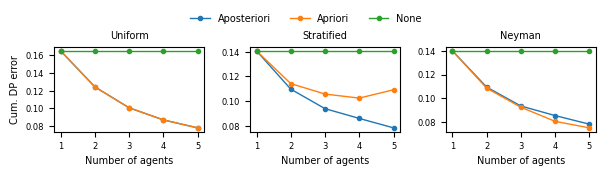

In [30]:
# create 1 x 3 figure
fig, axs = plt.subplots(1, 3)

# plot none, apriori, aposteriori for uniform
axs[0].plot(range(1, n+1), uniform_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[0].plot(range(1, n+1), uniform_cum_apriori_dps, 'o-', label='Apriori')
axs[0].plot(range(1, n+1), uniform_cum_none_dps, 'o-', label='None')

axs[0].set_xlabel('Number of agents')
axs[0].set_ylabel('Cum. DP error')
axs[0].set_title('Uniform')

# plot none, apriori, aposteriori for stratified
axs[1].plot(range(1, n+1), stratified_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[1].plot(range(1, n+1), stratified_cum_apriori_dps, 'o-', label='Apriori')
axs[1].plot(range(1, n+1), stratified_cum_none_dps, 'o-', label='None')

axs[1].set_xlabel('Number of agents')
axs[1].set_title('Stratified')

# plot none, apriori, aposteriori for neyman
axs[2].plot(range(1, n+1), neyman_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[2].plot(range(1, n+1), neyman_cum_apriori_dps, 'o-', label='Apriori')
axs[2].plot(range(1, n+1), neyman_cum_none_dps, 'o-', label='None')

axs[2].set_xlabel('Number of agents')
axs[2].set_title('Neyman')

# add legend outside of plot in the center
axs[0].legend(bbox_to_anchor=(2.5, 1.5), loc='upper right', ncol=3)

# add some space between plots
plt.subplots_adjust(wspace=0.3)

# set ylim (0.14, 0.32) for all plots
# y_min = 0.14; y_max = 0.32
# for ax in axs:
#     ax.set_ylim(y_min, y_max)

# save figure
# plot_name = f'gc_multicolab.pdf'
# plot_name = f'pp_multicolab.pdf'
# plot_name = f'ft_multicolab.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

In [31]:
base_name = f'{dataset}_multicolab'
save = True

# save to csv having columns: n, collaboration, cum_dp_error for uniform
# create rows for each collaboration: none, apriori, aposteriori
rows = []
for i in range(n):
    rows.append([i+1, 'none', uniform_cum_none_dps[i]])
    rows.append([i+1, 'apriori', uniform_cum_apriori_dps[i]])
    rows.append([i+1, 'aposteriori', uniform_cum_aposteriori_dps[i]])

df = pd.DataFrame(rows, columns=['n', 'collaboration', 'cum_dp_error'])
if save:
    df.to_csv(f'../results/plots_data/{base_name}_uniform.csv', index=False)

rows = []
for i in range(n):
    rows.append([i+1, 'none', stratified_cum_none_dps[i]])
    rows.append([i+1, 'apriori', stratified_cum_apriori_dps[i]])
    rows.append([i+1, 'aposteriori', stratified_cum_aposteriori_dps[i]])

df = pd.DataFrame(rows, columns=['n', 'collaboration', 'cum_dp_error'])
if save:
    df.to_csv(f'../results/plots_data/{base_name}_stratified.csv', index=False)

rows = []
for i in range(n):
    rows.append([i+1, 'none', neyman_cum_none_dps[i]])
    rows.append([i+1, 'apriori', neyman_cum_apriori_dps[i]])
    rows.append([i+1, 'aposteriori', neyman_cum_aposteriori_dps[i]])

df = pd.DataFrame(rows, columns=['n', 'collaboration', 'cum_dp_error'])
if save:
    df.to_csv(f'../results/plots_data/{base_name}_neyman.csv', index=False)

## With std

In [45]:
sample = 'uniform'
uniform_cum_apriori_dps, uniform_cum_aposteriori_dps, uniform_cum_none_dps, \
      uniform_cum_apriori_dps_std, uniform_cum_aposteriori_dps_std, uniform_cum_none_dps_std = get_dp_errors_with_std(root_dir, sample)

Number of files: 4 for k=2 and attr=Female
Number of files: 6 for k=3 and attr=Female
Number of files: 4 for k=4 and attr=Female
Number of files: 1 for k=5 and attr=Female
Number of files: 4 for k=2 and attr=African_American
Number of files: 6 for k=3 and attr=African_American
Number of files: 4 for k=4 and attr=African_American
Number of files: 1 for k=5 and attr=African_American
Number of files: 4 for k=2 and attr=Age_Below_TwentyFive
Number of files: 6 for k=3 and attr=Age_Below_TwentyFive
Number of files: 4 for k=4 and attr=Age_Below_TwentyFive
Number of files: 1 for k=5 and attr=Age_Below_TwentyFive
Number of files: 4 for k=2 and attr=Misdemeanor
Number of files: 6 for k=3 and attr=Misdemeanor
Number of files: 4 for k=4 and attr=Misdemeanor
Number of files: 1 for k=5 and attr=Misdemeanor
Number of files: 4 for k=2 and attr=Number_of_Priors
Number of files: 6 for k=3 and attr=Number_of_Priors
Number of files: 4 for k=4 and attr=Number_of_Priors
Number of files: 1 for k=5 and attr=N

In [46]:
sample = 'stratified'
stratified_cum_apriori_dps, stratified_cum_aposteriori_dps, stratified_cum_none_dps, \
      stratified_cum_apriori_dps_std, stratified_cum_aposteriori_dps_std, stratified_cum_none_dps_std = get_dp_errors_with_std(root_dir, sample)

Number of files: 4 for k=2 and attr=Female
Number of files: 6 for k=3 and attr=Female
Number of files: 4 for k=4 and attr=Female
Number of files: 1 for k=5 and attr=Female
Number of files: 4 for k=2 and attr=African_American
Number of files: 6 for k=3 and attr=African_American
Number of files: 4 for k=4 and attr=African_American
Number of files: 1 for k=5 and attr=African_American
Number of files: 4 for k=2 and attr=Age_Below_TwentyFive
Number of files: 6 for k=3 and attr=Age_Below_TwentyFive
Number of files: 4 for k=4 and attr=Age_Below_TwentyFive
Number of files: 1 for k=5 and attr=Age_Below_TwentyFive
Number of files: 4 for k=2 and attr=Misdemeanor
Number of files: 6 for k=3 and attr=Misdemeanor
Number of files: 4 for k=4 and attr=Misdemeanor
Number of files: 1 for k=5 and attr=Misdemeanor
Number of files: 4 for k=2 and attr=Number_of_Priors
Number of files: 6 for k=3 and attr=Number_of_Priors
Number of files: 4 for k=4 and attr=Number_of_Priors
Number of files: 1 for k=5 and attr=N

In [47]:
sample = 'neyman'
neyman_cum_apriori_dps, neyman_cum_aposteriori_dps, neyman_cum_none_dps, \
      neyman_cum_apriori_dps_std, neyman_cum_aposteriori_dps_std, neyman_cum_none_dps_std = get_dp_errors_with_std(root_dir, sample)

Number of files: 4 for k=2 and attr=Female
Number of files: 6 for k=3 and attr=Female
Number of files: 4 for k=4 and attr=Female
Number of files: 1 for k=5 and attr=Female
Number of files: 4 for k=2 and attr=African_American
Number of files: 6 for k=3 and attr=African_American
Number of files: 4 for k=4 and attr=African_American
Number of files: 1 for k=5 and attr=African_American
Number of files: 4 for k=2 and attr=Age_Below_TwentyFive
Number of files: 6 for k=3 and attr=Age_Below_TwentyFive
Number of files: 4 for k=4 and attr=Age_Below_TwentyFive
Number of files: 1 for k=5 and attr=Age_Below_TwentyFive
Number of files: 4 for k=2 and attr=Misdemeanor
Number of files: 6 for k=3 and attr=Misdemeanor
Number of files: 4 for k=4 and attr=Misdemeanor
Number of files: 1 for k=5 and attr=Misdemeanor
Number of files: 4 for k=2 and attr=Number_of_Priors
Number of files: 6 for k=3 and attr=Number_of_Priors
Number of files: 4 for k=4 and attr=Number_of_Priors
Number of files: 1 for k=5 and attr=N

In [48]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [7, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

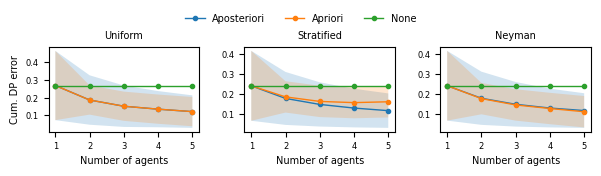

In [53]:
# create 1 x 3 figure
fig, axs = plt.subplots(1, 3)

# plot none, apriori, aposteriori for uniform with std
axs[0].plot(range(1, n+1), uniform_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[0].plot(range(1, n+1), uniform_cum_apriori_dps, 'o-', label='Apriori')
axs[0].plot(range(1, n+1), uniform_cum_none_dps, 'o-', label='None')

axs[0].fill_between(range(1, n+1), uniform_cum_aposteriori_dps - uniform_cum_aposteriori_dps_std, uniform_cum_aposteriori_dps + uniform_cum_aposteriori_dps_std, alpha=0.2)
axs[0].fill_between(range(1, n+1), uniform_cum_apriori_dps - uniform_cum_apriori_dps_std, uniform_cum_apriori_dps + uniform_cum_apriori_dps_std, alpha=0.2)
# axs[0].fill_between(range(1, n+1), uniform_cum_none_dps - uniform_cum_none_dps_std, uniform_cum_none_dps + uniform_cum_none_dps_std, alpha=0.2)

axs[0].set_xlabel('Number of agents')
axs[0].set_ylabel('Cum. DP error')
axs[0].set_title('Uniform')

# plot none, apriori, aposteriori for stratified with std
axs[1].plot(range(1, n+1), stratified_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[1].plot(range(1, n+1), stratified_cum_apriori_dps, 'o-', label='Apriori')
axs[1].plot(range(1, n+1), stratified_cum_none_dps, 'o-', label='None')

axs[1].fill_between(range(1, n+1), stratified_cum_aposteriori_dps - stratified_cum_aposteriori_dps_std, stratified_cum_aposteriori_dps + stratified_cum_aposteriori_dps_std, alpha=0.2)
axs[1].fill_between(range(1, n+1), stratified_cum_apriori_dps - stratified_cum_apriori_dps_std, stratified_cum_apriori_dps + stratified_cum_apriori_dps_std, alpha=0.2)
# axs[1].fill_between(range(1, n+1), stratified_cum_none_dps - stratified_cum_none_dps_std, stratified_cum_none_dps + stratified_cum_none_dps_std, alpha=0.2)

axs[1].set_xlabel('Number of agents')
axs[1].set_title('Stratified')

# plot none, apriori, aposteriori for neyman with std
axs[2].plot(range(1, n+1), neyman_cum_aposteriori_dps, 'o-', label='Aposteriori')
axs[2].plot(range(1, n+1), neyman_cum_apriori_dps, 'o-', label='Apriori')
axs[2].plot(range(1, n+1), neyman_cum_none_dps, 'o-', label='None')

axs[2].fill_between(range(1, n+1), neyman_cum_aposteriori_dps - neyman_cum_aposteriori_dps_std, neyman_cum_aposteriori_dps + neyman_cum_aposteriori_dps_std, alpha=0.2)
axs[2].fill_between(range(1, n+1), neyman_cum_apriori_dps - neyman_cum_apriori_dps_std, neyman_cum_apriori_dps + neyman_cum_apriori_dps_std, alpha=0.2)
# axs[2].fill_between(range(1, n+1), neyman_cum_none_dps - neyman_cum_none_dps_std, neyman_cum_none_dps + neyman_cum_none_dps_std, alpha=0.2)

axs[2].set_xlabel('Number of agents')
axs[2].set_title('Neyman')

# add legend outside of plot in the center
axs[0].legend(bbox_to_anchor=(2.5, 1.5), loc='upper right', ncol=3)

# add some space between plots
plt.subplots_adjust(wspace=0.3)

# set ylim (0.14, 0.32) for all plots
# y_min = 0.14; y_max = 0.32
# for ax in axs:
#     ax.set_ylim(y_min, y_max)

# save figure
# plot_name = f'gc_multicolab.pdf'
# plot_name = f'pp_multicolab.pdf'
plot_name = f'ft_multicolab.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

## OLD Code below

In [30]:
# compute_gain_ratio
gain_ratio_apriori = [[] for _ in range(n)]
gain_ratio_aposteriori = [[] for _ in range(n)]
for i in range(n):
    for k in range(n):
        gain_ratio_apriori[i].append(apriori_dps[i][0]/ apriori_dps[i][k])
        gain_ratio_aposteriori[i].append(aposteriori_dps[i][0]/ aposteriori_dps[i][k])

In [31]:
cumulative_gain_ratio_aposteriori = np.array(gain_ratio_aposteriori).sum(axis=0)
cumulative_gain_ratio_apriori = np.array(gain_ratio_apriori).sum(axis=0)

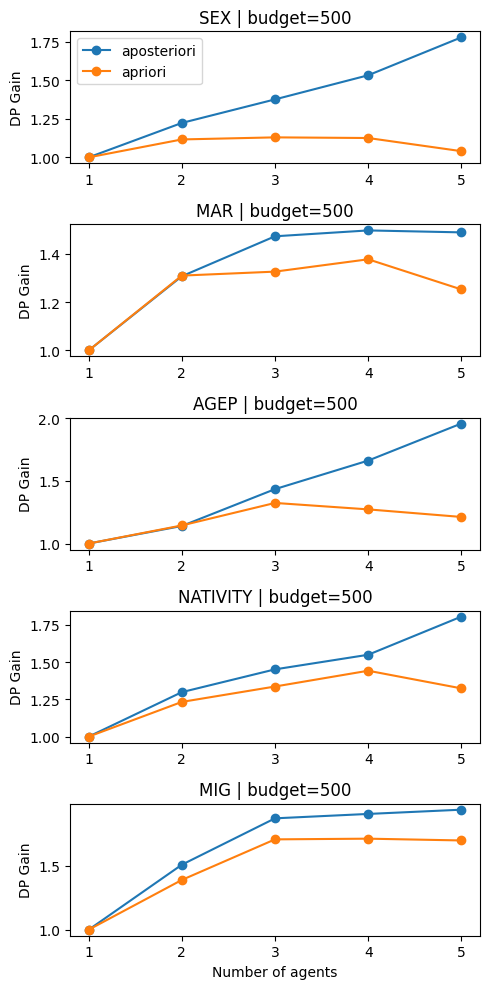

In [26]:
# create subplots (agents), show 2 strategies in same subplot
fig, axs = plt.subplots(n, 1, figsize=(5, 10))
for i in range(n):
    axs[i].plot(range(n), gain_ratio_aposteriori[i], 'o-', label='aposteriori')
    axs[i].plot(range(n), gain_ratio_apriori[i], 'o-', label='apriori')
    axs[i].set_title(f'{protected_attributes[i]} | budget={budget}')
    axs[i].set_ylabel('DP Gain')
    axs[i].set_xticks(range(n))
    axs[i].set_xticklabels(list(range(1, n+1)))
    
axs[0].legend()
axs[n-1].set_xlabel('Number of agents')
plt.tight_layout()
# plt.savefig(f'../results/latest/german_credit_multicolab_gain_b{budget}.pdf', dpi=200)


In [79]:
protected_attributes = [x.replace('_', ' ').title() for x in protected_attributes]

In [80]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [8, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend


/tmp/ipykernel_751900/3470603939.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


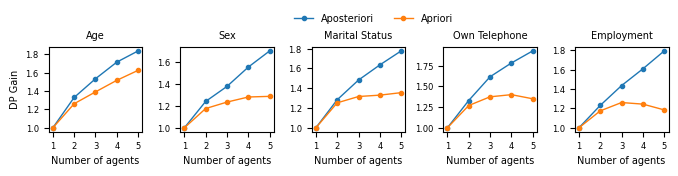

In [82]:
# create subplots (agents), show 2 strategies in same subplot
fig, axs = plt.subplots(1, n)
for i in range(n):
    axs[i].plot(range(n), gain_ratio_aposteriori[i], 'o-', label='Aposteriori')
    axs[i].plot(range(n), gain_ratio_apriori[i], 'o-', label='Apriori')
    axs[i].set_title(f'{protected_attributes[i]}')
    # axs[i].set_ylabel('Gain')
    axs[i].set_xticks(range(n))
    axs[i].set_xticklabels(list(range(1, n+1)))
    axs[i].set_xlabel('Number of agents')

axs[0].set_ylabel('DP Gain')
axs[1].legend()
axs[1].legend(bbox_to_anchor=(3, 1.5), loc='upper right', ncol=3)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
# plt.savefig(f'../results/plots/ft_multicolab_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'../results/plots/gc_multicolab_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')


In [17]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.1],
#    'figure.figsize': [8, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend


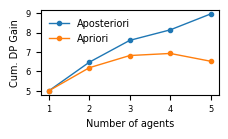

In [34]:
# plot cumulative gain ratio
plt.plot(range(1, n+1), cumulative_gain_ratio_aposteriori, 'o-', label='Aposteriori')
plt.plot(range(1, n+1), cumulative_gain_ratio_apriori, 'o-', label='Apriori')

plt.ylabel('Cum. DP Gain')
plt.xlabel('Number of agents')
plt.legend()
# plt.savefig(f'../results/plots/ft_multicolab_cumulative_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')